## Lyft and Uber cab fare prediction

In this project, we are predicting the Lyft's and Uber's cab fares for future rides. We want to determine the price of the ride not just by distance but also by the weather conditions, time of day, and day of the week.

Uber and Lyft, fortunately have a rich data set since there have been thousands of customers since both companies have started. This also means managing their data properly, enabling one to explore data to identify revelant data points, extract meaningful insights so that we can solve business problems such as this.

The goal of this predictive model is to generate a fare that improves customer trust and satisfaction without comprimising on comfort of the driver. Customer trust is the underlying goal since a trust-worthy company is more likely to be chosen than the competitors.

### Problem statement

The Uber/Lyft cab fare that is generated by the system takes only distance into consideration. However, the following problems are common while booking a cab:
1. Bad weather conditions
2. Bad Traffic conditions
3. Cab is booked at an odd time (Ex. After mid night)
4. High demand of cab due to weekend or during peak hours

Since these factors are not taken into consideration, as a result:
1. Going to the pick up point can be an arduous process for the driver
2. Covering short distances can be tough
3. The cab driver needs to comprimise on sleep for duty
4. The customer is frustrated if the cab cancels in the last minute
5. Gas usage and expenditure are high

The customer is dissatisfied, the driver has extra expenditure and low income, and Uber's business is  comprimised.

### Plan of action:

**STEP 1:** Collecting the Raw Data and Data pre-processing

**STEP 2:** Exploratory Data Analysis :-
* EDA refers to the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypothesis, and to check assumptions with the help of summary statistics and graphical representations. Understanding the data is powerful to gather insights from it. In short, EDA is all about making sense of data in hand.

**STEP 3:** Data Preparation :-
1. Label Encoding: Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.
2. Binning: Binning is the process of transforming numerical variables into categorical counterparts. Binning improves accuracy of the predictive models by reducing the noise or non-linearity in the dataset. Finally, binning allows easy identification of outliers, invalid and missing values of numerical variables.

**STEP 4:** Recursive Feature Elimination:
* RFE is a wrapper-type feature selection algorithm. The Machine Learning algorithm that used in the core of the method, is wrapped by RFE, which is used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score. 
RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internall

**STEP 5:** Feature Selection:
* A machine learning dataset for classification or regression is comprised of rows and columns, like an excel spreadsheet.
* Rows are often referred to as samples and columns are referred to as features. Feature engineering is selecting and transforming a subset of the most relevant features (columns) for a dataset.
* Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Some machine learning algorithms can be misled by irrelevant input features, resulting in worse predictive performance.

**STEP 6:** Modelling and Testing: Training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data.
  We have explored 4 ML models, namely -
  1. Linear Regression
  2. Random Forest
  3. Decision Tree
  4. Gradient Boosting Regressor

  Modelling:
  1. Fitting
  2. Accuracy score
  3. Hyper-parameter tuning

  Evaluation:
  1. Actual vs Predicted
  2. Cross Validation
  3. Performance Metric of each algorithm

**STEP 7:** Results  

#### STEP 1: Collecting the raw data and data pre-processing

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE

In [9]:
df = pd.read_csv('rideshare_kaggle.csv')

In [10]:
df.shape

(693071, 57)

In [11]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


* The dataset needs be narrowed down to a single datatype
* The date columns need to be modified
* The null values need to be handled
* Special characters need to be handled

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [14]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [15]:
# check for null values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [16]:
# check for duplicates
df.duplicated().sum()

0

#### STEP 2: Exploratory Data Analysis

In [18]:
df['cab_type'].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [19]:
df['name'].value_counts()

name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

##### Distribution of Price based on cab type

In [21]:
df[['name','price']].groupby('name').sum().sort_values('price',ascending=False)

,price
name,
Black SUV,1668679.50
Lux Black XL,1656124.55
Lux Black,1181605.55
Black,1130758.00
Lux,910509.50
UberXL,863803.00
Lyft XL,784375.20
WAV,538013.50
UberX,537997.00


1. The Black SUV and Lux Black XL have the maximum cab fares.
2. Shared and UberPool are the least expensive.
3. The remaining cab types are have neither the highest nor the lowest cab fare.
4. Density of Ubers are more than Lyft.

##### Conclusions/Assumptions
1. Customers might use these Black SUV and Lux Black XL for long distances.
2. The remaining cab types are mainly taken to travel within the city.
3. Uber Pool might have been used for a longer distance than Shared.

Text(0, 0.5, 'Cab type')

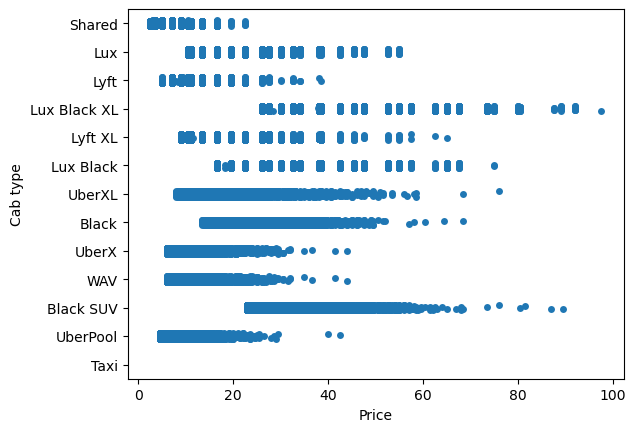

In [24]:
sns.stripplot(data=df, x='price', y='name')
plt.xlabel('Price')
plt.ylabel('Cab type')

##### Distribution of price based on weather conditions

In [26]:
df[['icon','price']].groupby('icon').sum().sort_values('price',ascending=False)

,price
icon,
cloudy,3330651.85
partly-cloudy-night,2412034.35
partly-cloudy-day,1761950.13
rain,1590462.30
clear-night,915586.35
clear-day,407551.00
fog,137157.00


1. Price distribution is highest on a clear night than a clear day.2. 
Price distribution is highest on cloudy days than rainy days
3. Price distribution is lower on rainy and foggy daysed.

##### Conclusions/ Assumptions

1. Customers travel shorter distances on rainy or foggy days
2. Customers take cabs at night to travel long distances. The traffic is higher.
3. Customers travel within the city no matter the weather conditions
4. Some customers travel long distances during cloudy days/nights or the wait time is higher

Text(0, 0.5, 'Weather Conditions')

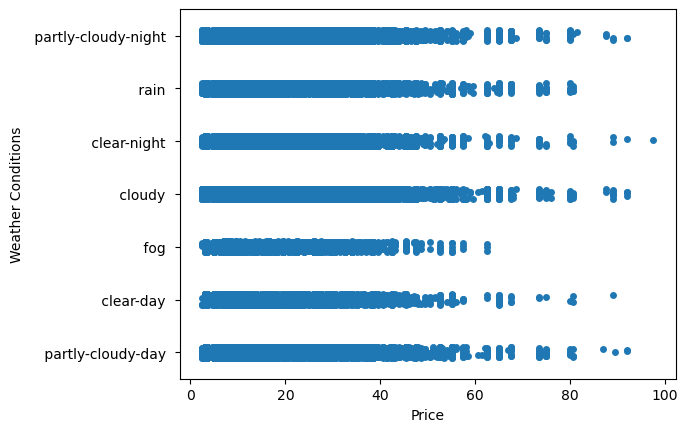

In [30]:
#strip plot to find the range of price based on weather conditiom 
sns.stripplot(data=df, x='price', y='icon')
plt.xlabel('Price')
plt.ylabel('Weather Conditions')

##### Price ditribution with distance

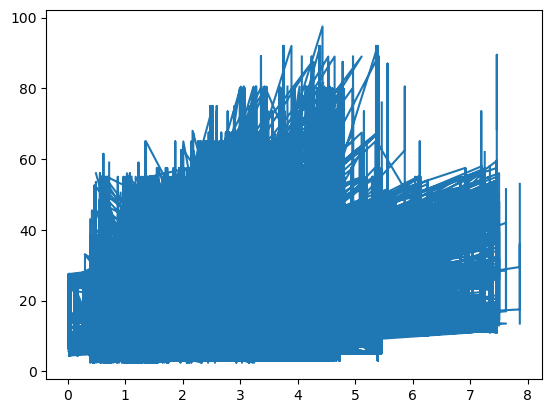

In [32]:
plt.plot(df['distance'],df['price'])
plt.show()

The graph is not linear. Ideally, price should increase with distance, but in this case it does not. We assume that due to heavy traffic or bad weather, the wait time is higher and that increases the fares.

Text(0, 0.5, 'distance')

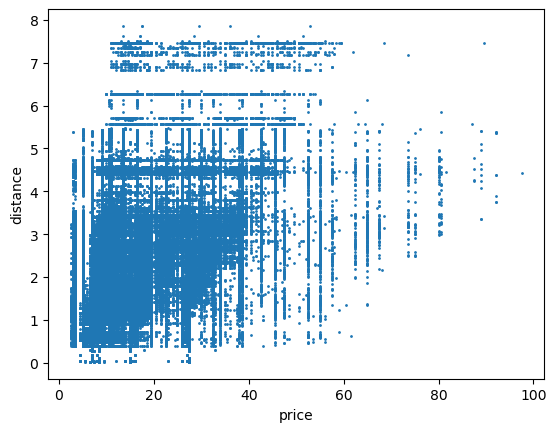

In [34]:
x=np.array(df['price'])
y=np.array(df['distance'])
plt.scatter(x,y,s=1)
plt.xlabel('price')
plt.ylabel('distance')

##### Hour vs Price

In [36]:
df[['hour','price']].groupby('hour').sum().sort_values('price',ascending=False)

,price
hour,
0,495121.50
23,484389.50
17,466269.50
13,463012.20
14,462999.50
11,462744.00
16,461929.35
12,461875.00
18,461778.00


In [37]:
df['hour'].value_counts().sort_index()

hour
0     32413
1     28548
2     28548
3     27815
4     28330
5     25008
6     27336
7     24936
8     24275
9     28971
10    30384
11    30384
12    30384
13    30384
14    30384
15    30383
16    30384
17    30384
18    30384
19    27555
20    26782
21    27732
22    29436
23    31931
Name: count, dtype: int64

1. Cabs run at all hours of the day with equal density
2. The highest cab fare was at 12 AM
3. Higher cab fares are noticed between 8PM AND 8AM, with lower density

Text(0, 0.5, 'price')

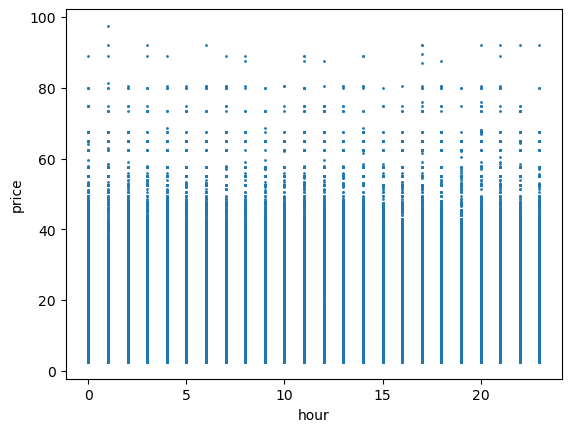

In [39]:
x=np.array(df['hour'])
y=np.array(df['price'])
plt.scatter(x,y,s=1)
plt.xlabel('hour')
plt.ylabel('price')

##### Handling DateTime Columns

In [41]:
df['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [42]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1.543463e+09
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 15:00:08
dt_object = 2018-11-27 07:30:24
dt_object = 2018-12-03 11:58:03
dt_object = 2018-11-30 21:43:04
dt_object = 2018-11-29 09:13:20


In [43]:
df['month'].value_counts()

month
12    406614
11    286457
Name: count, dtype: int64

It is observed that this data consists of total rides in November and December. There were more rides in December, probably due to the holiday season.

Text(0, 0.5, 'Total count')

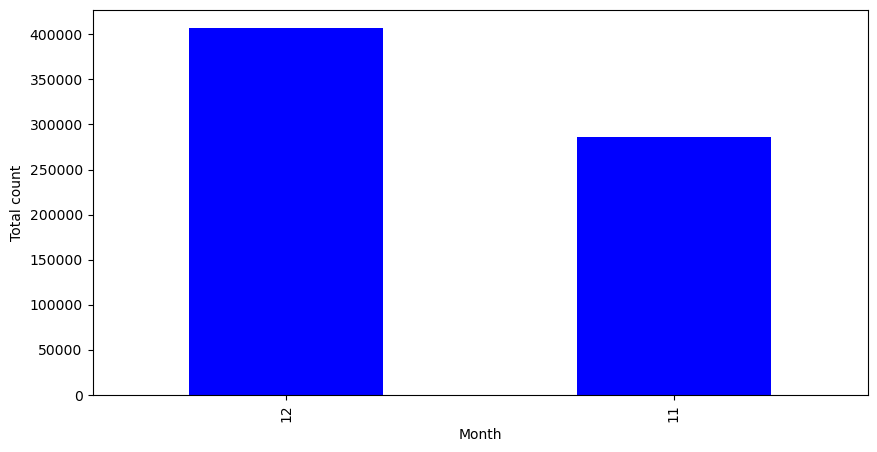

In [45]:
df['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("Month")
plt.ylabel("Total count")

Number of people who take cabs from each location

In [47]:
df['source'].value_counts()

source
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: count, dtype: int64

Text(0, 0.5, 'Total count')

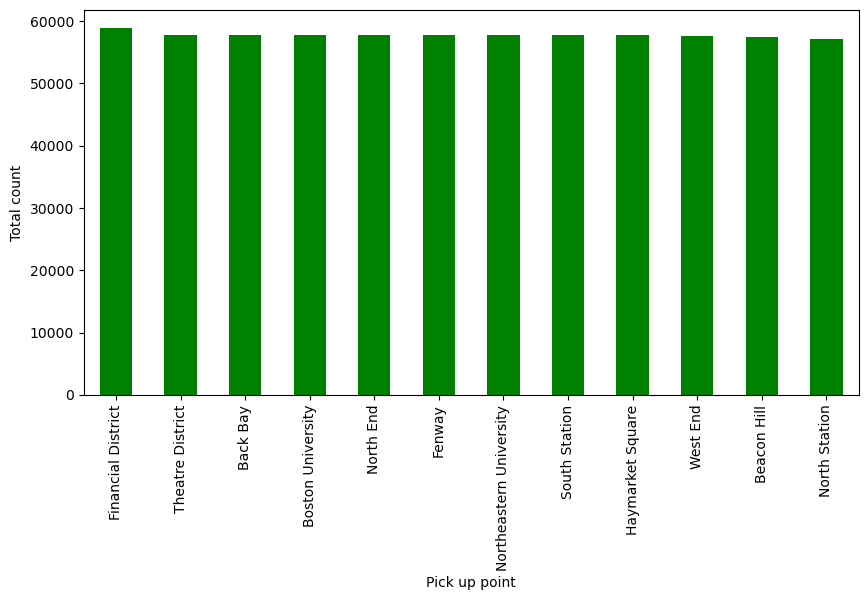

In [48]:
df['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.xlabel("Pick up point")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

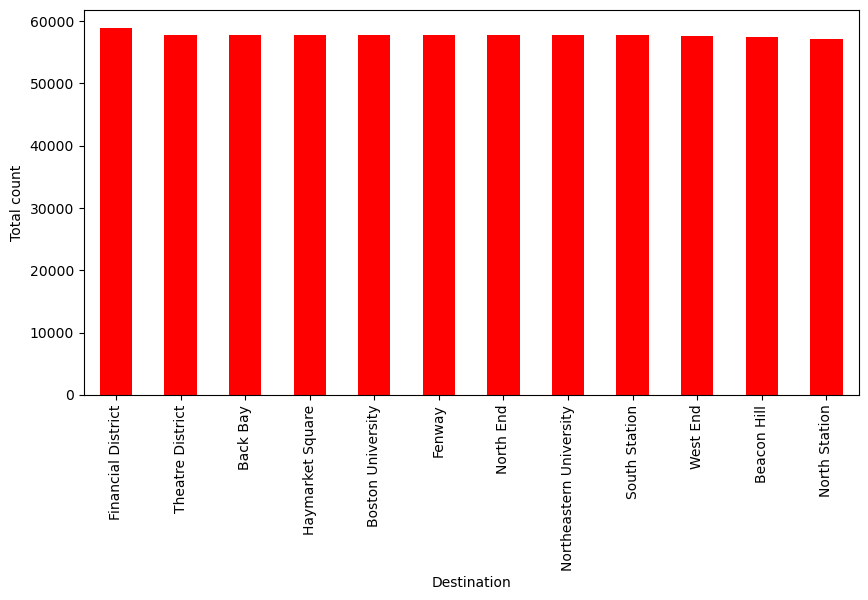

In [49]:
df['destination'].value_counts().plot(kind='bar', figsize=(10,5), color='red')
plt.xlabel("Destination")
plt.ylabel("Total count")

##### Uber vs Number of customers

In [51]:
df['cab_type'].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

More number of people take Ubers than Lyfts. There is more trust in Uber, probably because Lyft is relatively newer to the market.

Text(0, 0.5, 'Total count')

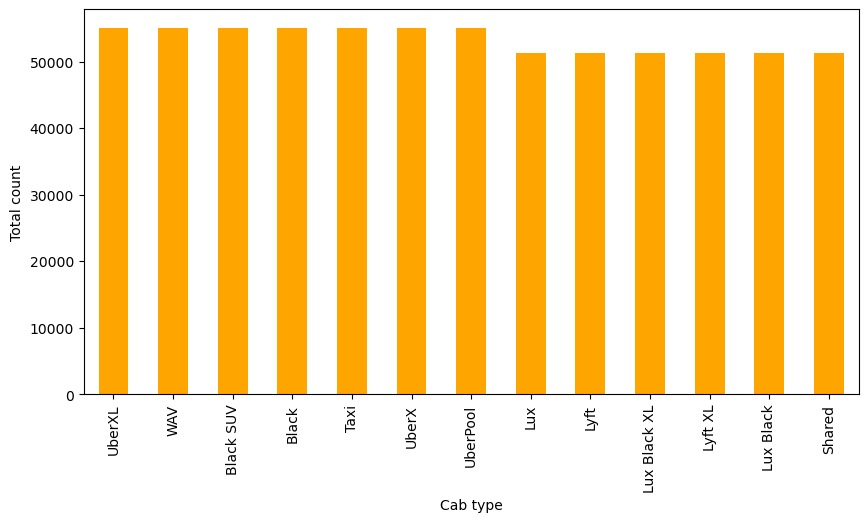

In [53]:
df['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')
plt.xlabel("Cab type")
plt.ylabel("Total count")

##### Weather conditions vs Customer Count

In [55]:
df['icon'].value_counts()

icon
cloudy                  218895
partly-cloudy-night     158030
partly-cloudy-day       115404
rain                    104556
clear-night              60294
clear-day                26832
fog                       9060
Name: count, dtype: int64

People take most cabs on cloudy days than rainy days.
1. November and December are cloudy most of the days
2. Customers take cabs mostly on cloudy days than any other day

Text(0, 0.5, 'Total count')

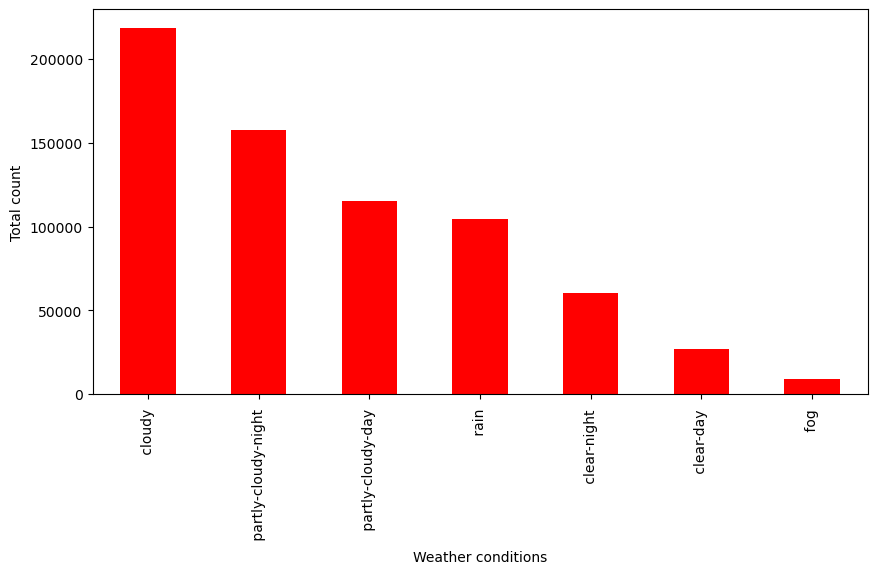

In [57]:
df['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')
plt.xlabel("Weather conditions")
plt.ylabel("Total count")

##### Number of customers per weekday

In [59]:
df['day-of-week'] = pd.to_datetime(df['datetime']).dt.day_name()

In [60]:
df.groupby('day-of-week')['id'].count().sort_values(ascending = False)

day-of-week
Tuesday      124949
Monday       124216
Thursday      98505
Sunday        91530
Saturday      90168
Friday        90012
Wednesday     73691
Name: id, dtype: int64

Monday and Tuesday have the highest number of customers

Text(0, 0.5, 'Number of customers')

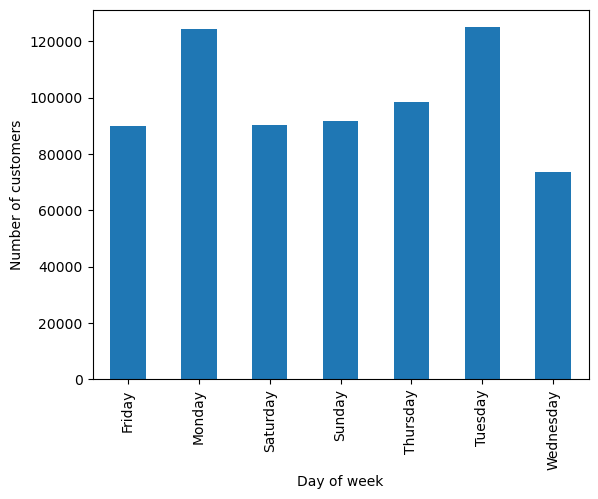

In [62]:
df.groupby('day-of-week')['id'].count().plot(kind='bar')
plt.xlabel('Day of week')
plt.ylabel('Number of customers')

In [63]:
from sklearn import preprocessing

#### STEP 3: Data Preparation

#### Seperating Data for Normalization and Encoding

All the continuous variables are seperated and normalised using MinMax Scaler and the categroical and object variables are divided into classes.

In [67]:
columnNames = df.columns
continuousColumns = []
for i in columnNames:
    if df.dtypes[i] == 'float64':
        continuousColumns.append(i)
    else:
        pass
print(continuousColumns)
continuousColumns.remove('timestamp')
print(continuousColumns)

['timestamp', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']
['price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']


In [68]:
#Dataset for Normalization
df_normal = df[continuousColumns]

In [69]:
df_normal.head()

,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,pressure,cloudCover,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,...,1021.98,0.72,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,...,1003.97,1.00,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,...,992.28,0.03,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,...,1013.73,0.00,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,...,998.36,0.44,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [70]:
#Dataset for label encoding
df_obj_features = df.drop(continuousColumns,axis =1)

In [71]:
df_obj_features.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,windBearing,uvIndex,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,day-of-week
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,57,0,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,90,0,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,240,0,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,310,0,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,303,0,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,Thursday


##### Data Normalization
Due to the large number of features, the algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore the data is normalized before training machine learning models on it.

In [73]:
names = df_normal.columns
print(names)

Index(['price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')


In [74]:
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(df_normal)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head() # Normalized Dataset

,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,pressure,cloudCover,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0.026316,0.053571,0.0,0.0,1.0,0.611590,0.554225,0.000000,0.0,0.517241,...,0.714075,0.72,1.000000,0.314155,0.250000,0.874572,0.883145,0.417488,0.776204,0.322832
1,0.089474,0.053571,0.0,0.0,1.0,0.643957,0.559326,0.897719,1.0,0.965517,...,0.334598,1.00,0.438328,0.198174,0.654762,0.891021,0.904987,0.566092,0.863669,0.529912
2,0.047368,0.053571,0.0,0.0,1.0,0.506917,0.461300,0.000000,0.0,0.637931,...,0.088285,0.03,1.000000,0.422831,0.702381,0.729267,0.718238,0.576355,0.680949,0.536991
3,0.247368,0.053571,0.0,0.0,1.0,0.403811,0.388113,0.000000,0.0,0.603448,...,0.540244,0.00,1.000000,0.198174,0.785714,0.000000,0.693120,0.472906,0.654745,0.339115
4,0.068421,0.053571,0.0,0.0,1.0,0.483686,0.415835,0.000000,0.0,0.551724,...,0.216393,0.44,1.000000,0.715068,0.750000,0.000685,0.635967,0.355911,0.612606,0.240708


##### Label Encoding

In [76]:
label_encoder = preprocessing.LabelEncoder() 

Below are the data types of each attribute before Label Encoding. The ML models are mathematical and cannot take string directly. We assign a number to each attribute so that the whole dataset is encoded and the ML model can form a mathematical correlation amongst the attributes.

In [78]:
df_obj_features.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
short_summary                   object
long_summary                    object
windGustTime                     int64
temperatureHighTime              int64
temperatureLowTime               int64
apparentTemperatureHighTime      int64
apparentTemperatureLowTime       int64
icon                            object
windBearing                      int64
uvIndex                          int64
sunriseTime                      int64
sunsetTime                       int64
uvIndexTime                      int64
temperatureMinTime       

In [79]:
# Encoding all the columns
df_obj_features['id']= label_encoder.fit_transform(df_obj_features['id']) 
df_obj_features['datetime']= label_encoder.fit_transform(df_obj_features['datetime']) 
df_obj_features['timezone']= label_encoder.fit_transform(df_obj_features['timezone'])
df_obj_features['destination']= label_encoder.fit_transform(df_obj_features['destination']) 
df_obj_features['product_id']= label_encoder.fit_transform(df_obj_features['product_id'])
df_obj_features['short_summary']= label_encoder.fit_transform(df_obj_features['short_summary'])
df_obj_features['long_summary']= label_encoder.fit_transform(df_obj_features['long_summary'])
df_obj_features['day-of-week']= label_encoder.fit_transform(df_obj_features['day-of-week'])

In [80]:
df_obj_features['cab_type']= label_encoder.fit_transform(df_obj_features['cab_type'])

In [81]:
print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [82]:
df_obj_features['name']= label_encoder.fit_transform(df_obj_features['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [83]:
df_obj_features['source']= label_encoder.fit_transform(df_obj_features['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [84]:
df_obj_features['icon']= label_encoder.fit_transform(df_obj_features['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


All the encoded columns have changed to int datatype. All those columns are encoded and can be fed into ML models

In [86]:
# checking the data type after label encoding
df_obj_features.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
cab_type                         int32
product_id                       int32
name                             int32
short_summary                    int32
long_summary                     int32
windGustTime                     int64
temperatureHighTime              int64
temperatureLowTime               int64
apparentTemperatureHighTime      int64
apparentTemperatureLowTime       int64
icon                             int32
windBearing                      int64
uvIndex                          int64
sunriseTime                      int64
sunsetTime                       int64
uvIndexTime                      int64
temperatureMinTime       

##### Combining the Encoded and the Normalized parts of the dataset together

In [88]:
df = df_normal.join(df_obj_features)

In [89]:
df['price']

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068     NaN
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [90]:
df.columns

Index(['price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'id', 'timestamp', 'hour', 'day', 'month',
       'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'windGustTime',
       'temperatureHighTime', 'temperatureLowTime',
       'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'icon',
       'windBearing', 'uvIndex', 'sunriseTime', 'sunsetTime', 'uvIndexTime',
       'temperatureMinTime', 'temperatureMaxTime',
       'apparentTemperatureM

### Binning

We are classifying the values of the surge multiplier into 5 buckets numbered from 0 to 4.

Surge multiplier is the value determined by the wait time of the cab - wether in traffic or before pick up - multiplied to the actual price of the cab fare. This is an indirect representation of the wait time.

In [93]:
df['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [94]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4, 2.5:5, 3.:6}
df['surge_multiplier'] = df['surge_multiplier'].map(surge_multiplier_mapping)

In the next 3 cells we find NAN values in the dataset and replace them with the median value as standard Data Science practice.

In [96]:
df.isnull().sum()

price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
visibility                         0
temperatureHigh                    0
temperatureLow                     0
apparentTemperatureHigh            0
apparentTemperatureLow             0
dewPoint                           0
pressure                           0
cloudCover                         0
visibility.1                       0
ozone                              0
moonPhase                          0
precipIntensityMax                 0
temperatureMin                     0
temperatureMax                     0
apparentTemperatureMin             0
a

In [97]:
df['price'].median()

13.5

In [98]:
df["price"].fillna(13.5, inplace = True) 

C:\Users\saitarun\AppData\Local\Temp\ipykernel_27940\3334779965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["price"].fillna(13.5, inplace = True)


In [99]:
df.isnull().sum()

price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
visibility                     0
temperatureHigh                0
temperatureLow                 0
apparentTemperatureHigh        0
apparentTemperatureLow         0
dewPoint                       0
pressure                       0
cloudCover                     0
visibility.1                   0
ozone                          0
moonPhase                      0
precipIntensityMax             0
temperatureMin                 0
temperatureMax                 0
apparentTemperatureMin         0
apparentTemperatureMax         0
id                             0
timestamp                      0
hour      

In [100]:
df['price'].dtype

dtype('float64')

In [101]:
df['price'] = df['price'].astype(int)

In [102]:
df['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

### STEP 4: RFE (Recursive Feature Elimination)

Our goal here is to find a correlation amongst the attributes of the dataset. Since we want to predict the price of the cab fare, we need to find a correlation between the price and the remaining attributes like weather conditions, time of day etc.

So we assign price to the y which is the dependent variable, and the influencing attributes to X.

Mathematically, an algebriac equation can be defined between X and y, based on the reccurring patterns of the encoded values.

In [105]:
X = df.drop('price', axis = 1)
y = df['price']

In [106]:
X.head()

,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,windBearing,uvIndex,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,day-of-week
0,0.44,0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,...,57,0,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,3
1,0.44,0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,...,90,0,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,5
2,0.44,0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,...,240,0,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,6
3,0.44,0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,...,310,0,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,0
4,0.44,0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,...,303,0,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,4


In [107]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [108]:
X.shape

(693071, 57)

In [109]:
y.shape

(693071,)

In [110]:
y.value_counts()

price
13    95027
7     70266
16    57005
9     53623
10    47660
      ...  
76        2
61        2
81        1
63        1
97        1
Name: count, Length: 75, dtype: int64

The below graph shows the frequency of the price in November and December. 13 USD is the most frequent cab fare and 97 USD is the least frequent cab fare.

Text(0, 0.5, 'Total count')

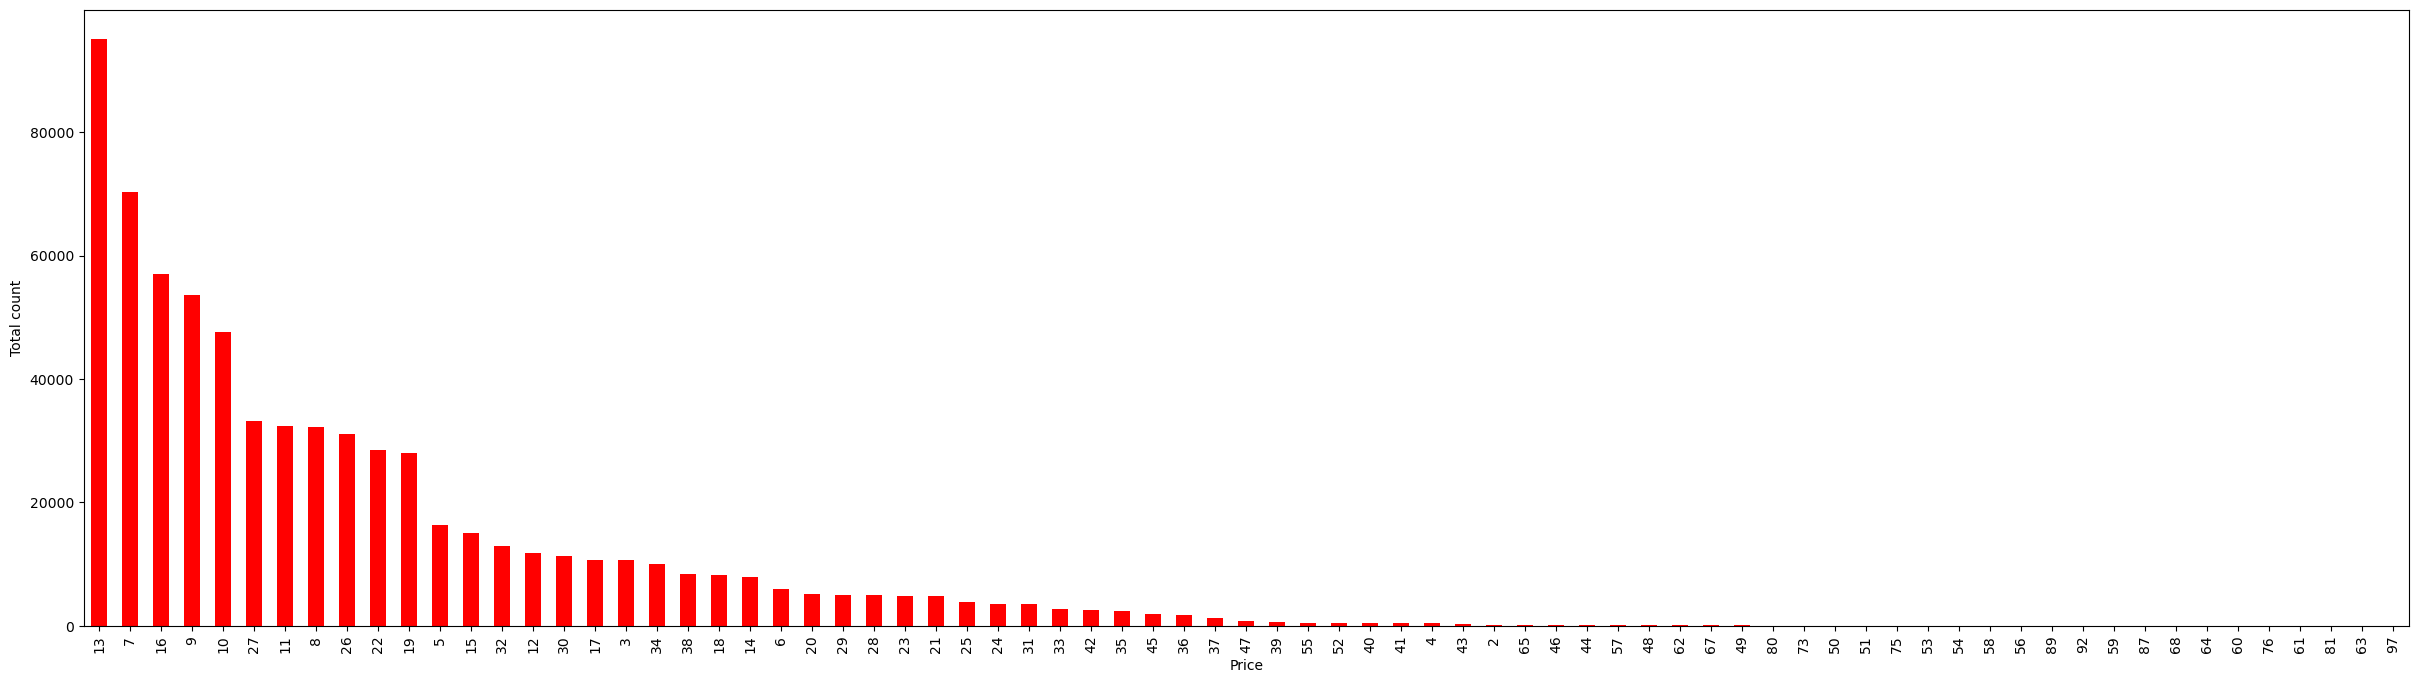

In [112]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='red')
plt.xlabel("Price")
plt.ylabel("Total count")

#### Splitting the data set into training set and test set for training and validation of the ML Models

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [115]:
X_train.shape

(554456, 57)

In [116]:
X_test.shape

(138615, 57)

In [117]:
y_train.shape

(554456,)

In [118]:
y_test.shape

(138615,)

##### Understanding the influence of each feature on price

Since this is a regression model, to determine the importance of each feature, the model assigns a coefficient as the score. Below is the assigned score for each feature:

In [121]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

Feature: 0, Score: 2.55669
Feature: 1, Score: 5.13461
Feature: 2, Score: 1.00017
Feature: 3, Score: 1.15865
Feature: 4, Score: -0.01015
Feature: 5, Score: 0.00302
Feature: 6, Score: -0.44246
Feature: 7, Score: -0.01040
Feature: 8, Score: -0.15044
Feature: 9, Score: -0.00884
Feature: 10, Score: 0.00533
Feature: 11, Score: -0.00155
Feature: 12, Score: -0.17282
Feature: 13, Score: -0.03111
Feature: 14, Score: 0.09782
Feature: 15, Score: 0.02252
Feature: 16, Score: 0.00467
Feature: 17, Score: -0.00036
Feature: 18, Score: 0.02636
Feature: 19, Score: -0.00155
Feature: 20, Score: -0.00131
Feature: 21, Score: 0.02643
Feature: 22, Score: -0.44830
Feature: 23, Score: -0.02517
Feature: 24, Score: 0.18028
Feature: 25, Score: 0.01865
Feature: 26, Score: -0.09875
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.00001
Feature: 29, Score: 0.01936
Feature: 30, Score: 0.45864
Feature: 31, Score: 13.84267
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.03336
Feature: 35, S

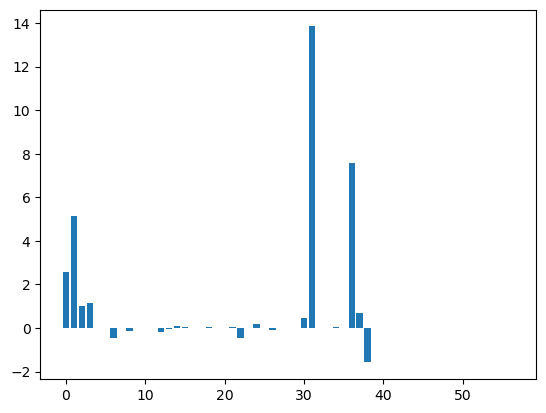

In [122]:
importance = reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

###### The important features have the maximum score as listed below:
* Feature: 3, Score: 0.45864
* Feature: 4, Score: 13.84267
* Feature: 7, Score: 0.03336
* Feature: 9, Score: 7.57630
* Feature: 10, Score: 0.68070
* Feature: 12, Score: 2.55669
* Feature: 13, Score: 5.13461
* Feature: 14, Score: 1.00017
* Feature: 15, Score: 1.15865
* Feature: 35, Score: 0.00632
* Feature: 50, Score: 0.18028
* Feature: 52, Score: 0.01865
* Feature: 56, Score: 0.00481

In [124]:
print(X.columns[3])
print(X.columns[4])
print(X.columns[7])
print(X.columns[9])
print(X.columns[10])
print(X.columns[12])
print(X.columns[13])
print(X.columns[14])
print(X.columns[15])
print(X.columns[35])
print(X.columns[50])
print(X.columns[52])
print(X.columns[56])

longitude
temperature
precipProbability
windSpeed
windGust
temperatureHigh
temperatureLow
apparentTemperatureHigh
apparentTemperatureLow
destination
sunsetTime
temperatureMinTime
day-of-week


##### Testing the training accuracy with all 56 features

In [126]:
rfe = RFE(reg,n_features_to_select=56, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.


In [127]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [128]:
XX = X[X.columns[rfe.support_]]

In [129]:
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,windBearing,uvIndex,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,day-of-week
0,0.44,0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,...,57,0,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,3
1,0.44,0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,...,90,0,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,5
2,0.44,0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,...,240,0,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,6
3,0.44,0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,...,310,0,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,0
4,0.44,0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,...,303,0,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,4


In [130]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [131]:
X_train.shape

(485149, 56)

In [132]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [133]:
reg1.score(X_train, y_train)

0.5264086776246686

##### Testing the training accuracy with 40 features

In [135]:
rfe = RFE(reg,n_features_to_select= 40,step=1)
rfe = rfe.fit(X, y)

In [136]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True])

In [137]:
XX = X[X.columns[rfe.support_]]

In [138]:
#Final Dateset after preprocessing 
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,source,destination,cab_type,product_id,name,short_summary,long_summary,icon,uvIndex,day-of-week
0,0.44,0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,...,5,7,0,8,7,4,9,5,0,3
1,0.44,0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,...,5,7,0,12,2,8,10,6,0,5
2,0.44,0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,...,5,7,0,7,5,0,2,1,0,6
3,0.44,0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,...,5,7,0,10,4,0,6,1,0,0
4,0.44,0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,...,5,7,0,11,6,6,4,5,0,4


In [139]:
#Splitting the final data set into test and train
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [140]:
X_train.shape

(485149, 40)

In [141]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [142]:
reg1.score(X_train, y_train)

0.5264022449568695

##### Testing the training accuracy with 15 features

In [144]:
rfe = RFE(reg,n_features_to_select=15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [145]:
XX = X[X.columns[rfe.support_]]

In [146]:
XX.head()

,distance,surge_multiplier,latitude,longitude,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,dewPoint,temperatureMax,apparentTemperatureMax,source,cab_type,product_id,name
0,0.44,0,42.2148,-71.033,0.0000,0.68,43.68,37.95,32.70,43.68,38.07,5,0,8,7
1,0.44,0,42.2148,-71.033,0.1299,0.94,47.30,43.92,41.83,47.30,43.92,5,0,12,2
2,0.44,0,42.2148,-71.033,0.0000,0.75,47.55,44.12,31.10,47.55,44.12,5,0,7,5
3,0.44,0,42.2148,-71.033,0.0000,0.73,45.03,38.53,26.64,45.03,38.53,5,0,10,4
4,0.44,0,42.2148,-71.033,0.0000,0.70,42.18,35.75,28.61,42.18,35.75,5,0,11,6


In [147]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [148]:
X_train.shape

(485149, 15)

In [149]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [150]:
reg1.score(X_train, y_train)

0.526375236736347

##### Testing the training accuracy with 25 features

In [152]:
rfe = RFE(reg, n_features_to_select=25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [153]:
XX = X[X.columns[rfe.support_]]
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,precipProbability,humidity,temperatureHigh,temperatureLow,...,temperatureMax,apparentTemperatureMax,month,source,destination,cab_type,product_id,name,uvIndex,day-of-week
0,0.44,0,42.2148,-71.033,42.34,0.0000,0.0,0.68,43.68,34.19,...,43.68,38.07,12,5,7,0,8,7,0,3
1,0.44,0,42.2148,-71.033,43.58,0.1299,1.0,0.94,47.30,42.10,...,47.30,43.92,11,5,7,0,12,2,0,5
2,0.44,0,42.2148,-71.033,38.33,0.0000,0.0,0.75,47.55,33.10,...,47.55,44.12,11,5,7,0,7,5,0,6
3,0.44,0,42.2148,-71.033,34.38,0.0000,0.0,0.73,45.03,28.90,...,45.03,38.53,11,5,7,0,10,4,0,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,0.0,0.70,42.18,36.71,...,42.18,35.75,11,5,7,0,11,6,0,4


In [154]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [155]:
X_train.shape

(485149, 25)

In [156]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [157]:
reg1.score(X_train, y_train)

0.5262112568701125

#### Columns After RFE

In [159]:
XX.columns

Index(['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'dewPoint', 'cloudCover',
       'moonPhase', 'precipIntensityMax', 'temperatureMax',
       'apparentTemperatureMax', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'uvIndex', 'day-of-week'],
      dtype='object')

In [160]:
XX.shape

(693071, 25)

In [161]:
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,precipProbability,humidity,temperatureHigh,temperatureLow,...,temperatureMax,apparentTemperatureMax,month,source,destination,cab_type,product_id,name,uvIndex,day-of-week
0,0.44,0,42.2148,-71.033,42.34,0.0000,0.0,0.68,43.68,34.19,...,43.68,38.07,12,5,7,0,8,7,0,3
1,0.44,0,42.2148,-71.033,43.58,0.1299,1.0,0.94,47.30,42.10,...,47.30,43.92,11,5,7,0,12,2,0,5
2,0.44,0,42.2148,-71.033,38.33,0.0000,0.0,0.75,47.55,33.10,...,47.55,44.12,11,5,7,0,7,5,0,6
3,0.44,0,42.2148,-71.033,34.38,0.0000,0.0,0.73,45.03,28.90,...,45.03,38.53,11,5,7,0,10,4,0,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,0.0,0.70,42.18,36.71,...,42.18,35.75,11,5,7,0,11,6,0,4


#### STEP 6: Feature Selection

In [163]:
features_drop = [ 'humidity', 'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint', 'temperatureMax',
       'apparentTemperatureMax']
new_df = XX.drop(features_drop, axis=1)

In [164]:
new_df.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,precipProbability,temperatureLow,cloudCover,moonPhase,precipIntensityMax,month,source,destination,cab_type,product_id,name,uvIndex,day-of-week
0,0.44,0,42.2148,-71.033,42.34,0.0000,0.0,34.19,0.72,0.30,0.1276,12,5,7,0,8,7,0,3
1,0.44,0,42.2148,-71.033,43.58,0.1299,1.0,42.10,1.00,0.64,0.1300,11,5,7,0,12,2,0,5
2,0.44,0,42.2148,-71.033,38.33,0.0000,0.0,33.10,0.03,0.68,0.1064,11,5,7,0,7,5,0,6
3,0.44,0,42.2148,-71.033,34.38,0.0000,0.0,28.90,0.00,0.75,0.0000,11,5,7,0,10,4,0,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,0.0,36.71,0.44,0.72,0.0001,11,5,7,0,11,6,0,4


In [165]:
new_df.shape

(693071, 19)

In [166]:
new_df.fillna(0, inplace=True)

#### STEP 7: Modelling and Testing

In [168]:
y.shape

(693071,)

In [170]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(new_df, y, test_size = 0.2, random_state = 42)

In [172]:
xx_train.shape

(554456, 19)

In [174]:
xx_test.shape

(138615, 19)

In [176]:
yy_train.shape

(554456,)

In [178]:
yy_test.shape

(138615,)

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [182]:
new_df.fillna(X_train.mean(), inplace=True)

#### Linear Regression

In [185]:
from scipy.stats import loguniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline to scale the data and apply Linear Regression
linear = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None))

**1. Fitting**

In [190]:
linear.fit(xx_train, yy_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**2. Accuracy Score**

In [193]:
print('linear_score : ',linear.score(xx_test, yy_test))
linear_score=linear.score(xx_test, yy_test)

linear_score :  0.5249820205831788


##### Testing Linear Regression

In [196]:
prediction = linear.predict(xx_test)
prediction=  prediction.astype(int)

**1. Actual vs Prediction**

Text(0, 0.5, 'Predicted Y')

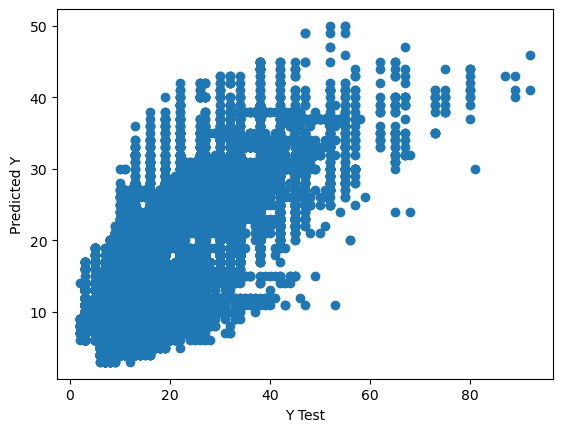

In [199]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**2. Performance metric of the Linear Regression Model**

In [202]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   4.786487753850594
MSE :   38.45307506402626
RMAE :   6.201054350997599


In [204]:
linear_score=linear.score(xx_test, yy_test)
linear_MAE=metrics.mean_absolute_error(yy_test,prediction)
linear_MSE= metrics.mean_squared_error(yy_test,prediction)
linear_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\saitarun\AppData\Local\Temp\ipykernel_27940\3065719078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yy_test - prediction,bins=50)


<Axes: xlabel='price', ylabel='Density'>

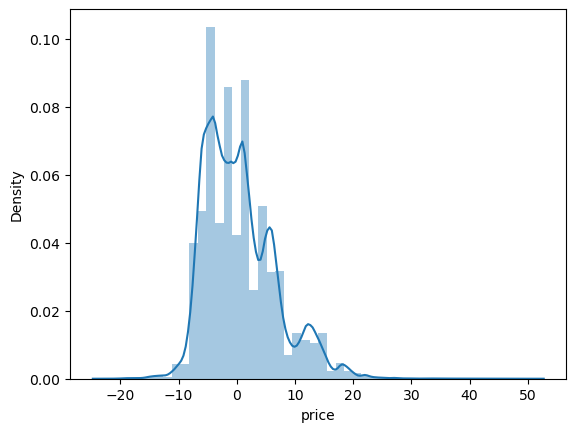

In [206]:
sns.distplot(yy_test - prediction,bins=50)

**3. K Cross-validation**

In [209]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.52811673, 0.52813062, 0.52446251, 0.52223455, 0.52055002])

##### Conclusion:
Linear regression is not a good model for this data since this data is not linear. This data is too complex for a linear model.

The remaining ML Models are more robust for this data. These models learns the variety of data better.

#### Decision Tree

**1. Hyper performance tuning**

In [214]:
decision = DecisionTreeRegressor(random_state = 0, max_depth=12)

**2. Fitting**

In [217]:
decision.fit(xx_train , yy_train)

DecisionTreeRegressor(max_depth=12, random_state=0)

**3. Accuracy Score**

In [220]:
print('Decision_tree_score :',decision.score(xx_test, yy_test))

Decision_tree_score : 0.96525270449834


##### Testing decision tree

**1. Actual vs Predicted values**

In [224]:
prediction=decision.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

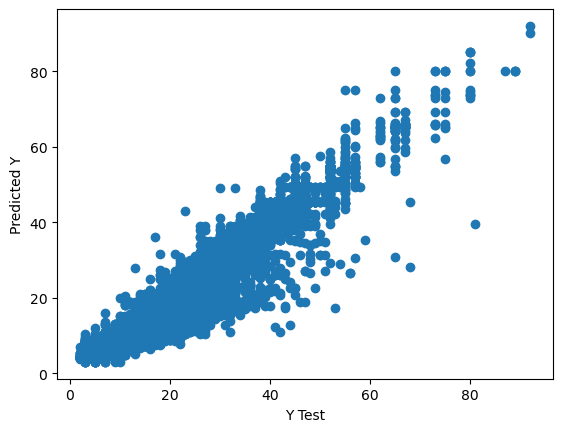

In [226]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**2. Performance metric of the Decision tree model**

In [229]:
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0172356524430664
MSE :   2.7878175031743164
RMAE :   1.6696758676983734


In [231]:
decision_score=decision.score(xx_test, yy_test)
decision_MAE=metrics.mean_absolute_error(yy_test,prediction)
decision_MSE= metrics.mean_squared_error(yy_test,prediction)
decision_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\saitarun\AppData\Local\Temp\ipykernel_27940\3065719078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yy_test - prediction,bins=50)


<Axes: xlabel='price', ylabel='Density'>

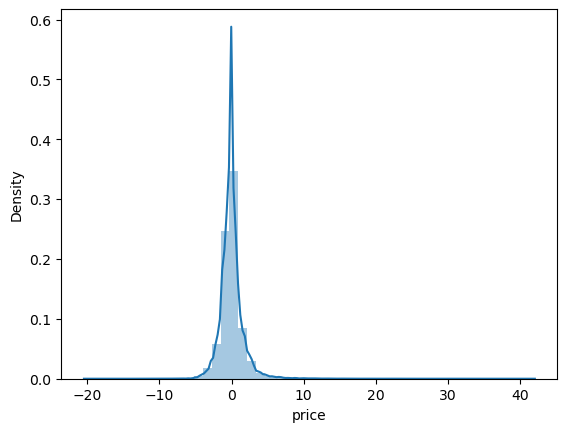

In [233]:
sns.distplot(yy_test - prediction,bins=50)

**3. K Cross-validation for decision tree**

In [236]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),xx_test,yy_test,cv=cv)

array([0.92824144, 0.9321064 , 0.93467379, 0.92983116, 0.92766638])

#### Random Forest

**1. Hyper performance tuning**

In [240]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(xx_train, yy_train)

##print(g_search.best_params_)

C:\Users\saitarun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saitarun\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saitarun\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\saitarun\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\saitarun\anaconda3\Li

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [242]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 

**2. Fitting**

In [245]:
random.fit(xx_train , yy_train)

RandomForestRegressor(random_state=0)

**3. Scoring**

In [248]:
print('Random_forest_score :',random.score(xx_test, yy_test))
random_score=random.score(xx_test, yy_test)

Random_forest_score : 0.9614394304999585


##### Testing the Random Forest Model

**1. Actual vs Predicted**

In [252]:
prediction = random.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

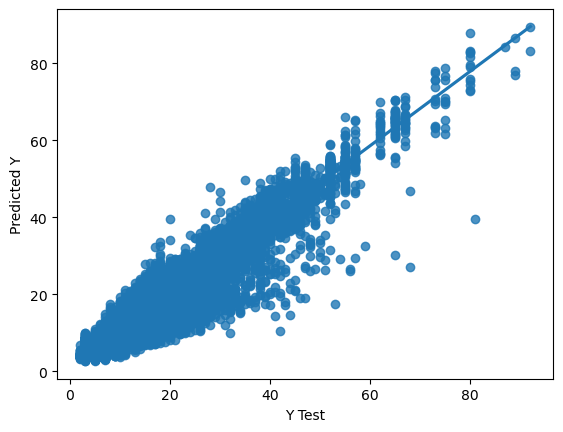

In [254]:
sns.regplot(x=yy_test,y=prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**2. Performance metric of Random Forest Model**

In [257]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0614610918888534
MSE :   3.093761083634542
RMAE :   1.7589090606493964


In [259]:
random_score=random.score(xx_test, yy_test)
random_MAE=metrics.mean_absolute_error(yy_test,prediction)
random_MSE=metrics.mean_squared_error(yy_test,prediction)
random_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\saitarun\AppData\Local\Temp\ipykernel_27940\3065719078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yy_test - prediction,bins=50)


<Axes: xlabel='price', ylabel='Density'>

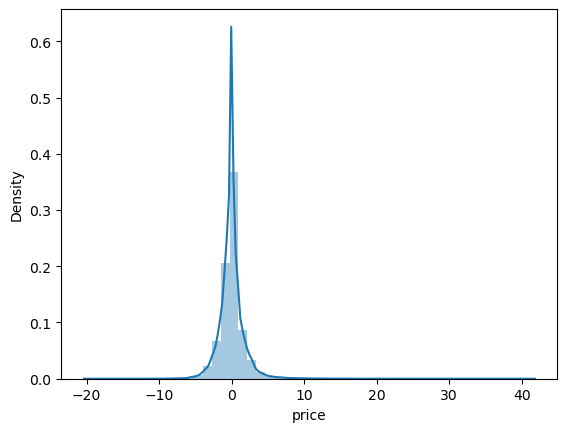

In [261]:
sns.distplot(yy_test - prediction,bins=50)

In [263]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),xx_test,yy_test,cv=cv)

array([0.95905431, 0.96162314, 0.96198328, 0.96153654, 0.95817591])

### Gradient Boosting Regressor

**1. Hyper performance tuning**

In [267]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)

**2.Fitting**

In [270]:
clf.fit(xx_train, yy_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

**3. Scoring**

In [273]:
print('Grdient_Boosting_Regressor_score :',clf.score(xx_test, yy_test))

Grdient_Boosting_Regressor_score : 0.9677400632164277


#### Testing the Gradient Booster Model

**1. Actual vs Predicted**

In [277]:
prediction=clf.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

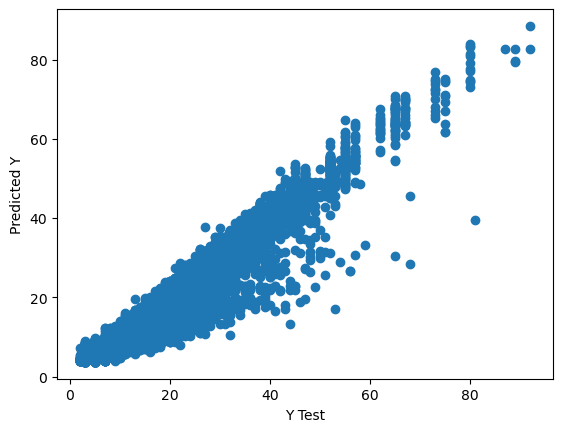

In [279]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**2. Performace metric of Gradient Boosting Model**

In [282]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0173073095721925
MSE :   2.588253707752402
RMAE :   1.6088050558574218


In [284]:
Gradient_score=clf.score(xx_test, yy_test)
Gradient_MAE=metrics.mean_absolute_error(yy_test,prediction)
Gradient_MSE=metrics.mean_squared_error(yy_test,prediction)
Gradient_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

C:\Users\saitarun\AppData\Local\Temp\ipykernel_27940\3065719078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yy_test - prediction,bins=50)


<Axes: xlabel='price', ylabel='Density'>

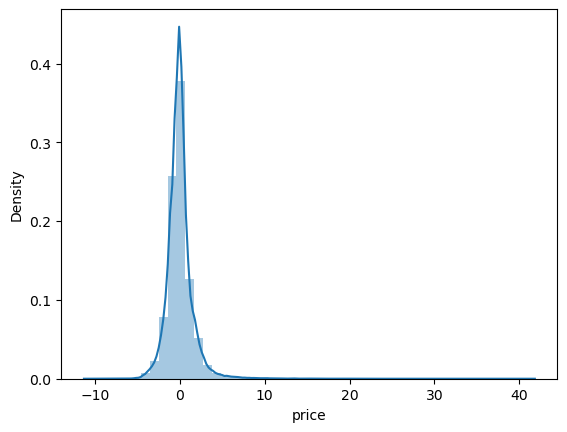

In [286]:
sns.distplot(yy_test - prediction,bins=50)

**3. K Cross-validation**

In [289]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(clf,xx_test,yy_test,cv=cv)

array([0.96513233, 0.96756946, 0.96762548, 0.96701732, 0.96495275])

### Price prediction function

In [292]:
new_df.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,precipProbability,temperatureLow,cloudCover,moonPhase,precipIntensityMax,month,source,destination,cab_type,product_id,name,uvIndex,day-of-week
0,0.44,0,42.2148,-71.033,42.34,0.0000,0.0,34.19,0.72,0.30,0.1276,12,5,7,0,8,7,0,3
1,0.44,0,42.2148,-71.033,43.58,0.1299,1.0,42.10,1.00,0.64,0.1300,11,5,7,0,12,2,0,5
2,0.44,0,42.2148,-71.033,38.33,0.0000,0.0,33.10,0.03,0.68,0.1064,11,5,7,0,7,5,0,6
3,0.44,0,42.2148,-71.033,34.38,0.0000,0.0,28.90,0.00,0.75,0.0000,11,5,7,0,10,4,0,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,0.0,36.71,0.44,0.72,0.0001,11,5,7,0,11,6,0,4


In [298]:
def predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_df.columns==name)[0]

    x = np.zeros(len(new_df.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return random.predict([x])[0]

In [300]:
pre= random.predict(xx_test)

In [302]:
# Follow these instructions before predicting the price:
# For name: Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5

# For Source: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11

# For Surge_multiplier : Enter Surge Multiplier value from 0 to 4

# for Icon: clear-day --> 0 , clear-night --> 1 , cloudy --> 2 , fog --> 3 , partly-cloudy-day --> 4 , partly-cloudy-night --> 5 , rain --> 6

# predict_price(name , source , surge_multiplier , icon)

In [304]:
predict_price(2 , 3, 2, 5)

C:\Users\saitarun\AppData\Local\Temp\ipykernel_27940\613536636.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
C:\Users\saitarun\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


25.808333333333334

### Result Metrics

Text(0.5, 0, 'algorithm')

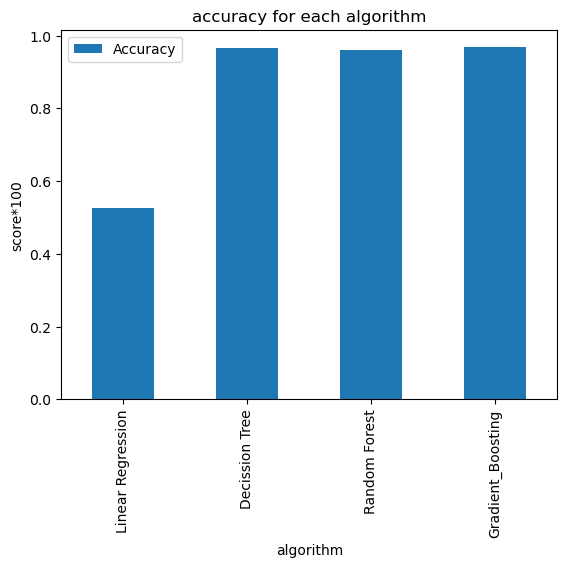

In [307]:
l1=['Linear Regression',linear_score]
l2=['Decission Tree',decision_score]
l3=['Random Forest',random_score]
l4=['Gradient_Boosting',Gradient_score]
cols=['Algo','Accuracy']
df= pd.DataFrame([list(l1),list(l2),list(l3),list(l4)],columns=cols)
df.set_index('Algo').plot(kind='bar')
plt.title("accuracy for each algorithm")
plt.ylabel("score*100")
plt.xlabel("algorithm")

In [309]:
l1=['Linear Regression',linear_MAE,linear_MSE,linear_RMAE]
l2=['Decission Tree',decision_MAE,decision_MSE,decision_RMAE]
l3=['Random Forest',random_MAE,random_MSE,random_RMAE]
l4=['Gradient_Boosting',Gradient_MAE,Gradient_MSE,Gradient_RMAE]
cols=['Algo','MAE','MSE','RMAE']

In [311]:
df= pd.DataFrame([list(l1),list(l2),list(l3),list(l4)],columns=cols)

In [313]:
df

,Algo,MAE,MSE,RMAE
0,Linear Regression,4.786488,38.453075,6.201054
1,Decission Tree,1.017236,2.787818,1.669676
2,Random Forest,1.061461,3.093761,1.758909
3,Gradient_Boosting,1.017307,2.588254,1.608805


Text(0, 0.5, 'algorithm')

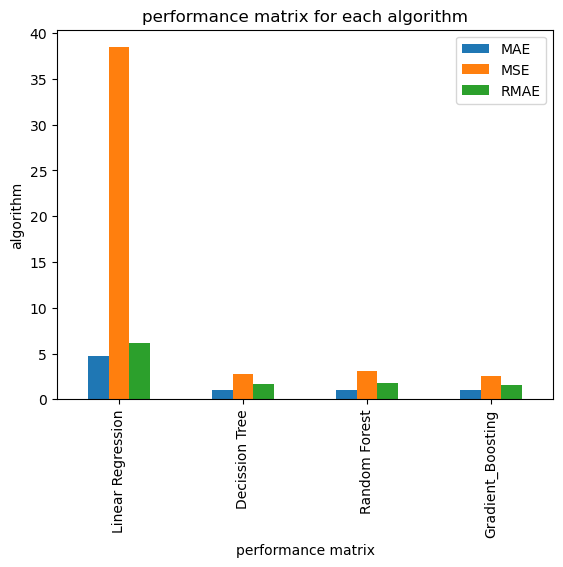

In [315]:
df.set_index('Algo').plot(kind='bar')
plt.title("performance matrix for each algorithm")
plt.xlabel("performance matrix")
plt.ylabel("algorithm")

The attributes on the left side that is red color coded has more impact on the price than the blue portion. That is, surge multiplier, product ID, Name and distance.

In [318]:
import shap
explainer=shap.TreeExplainer(decision)
shap_values = explainer.shap_values(X_test)
shap_plot = shap.force_plot(explainer.expected_value, 
    shap_values[-1:], features=X_test.iloc[-1:], 
    feature_names=X_test.columns[0:20],
    matplotlib=True, show=False, plot_cmap=['#77dd77', '#f99191'])

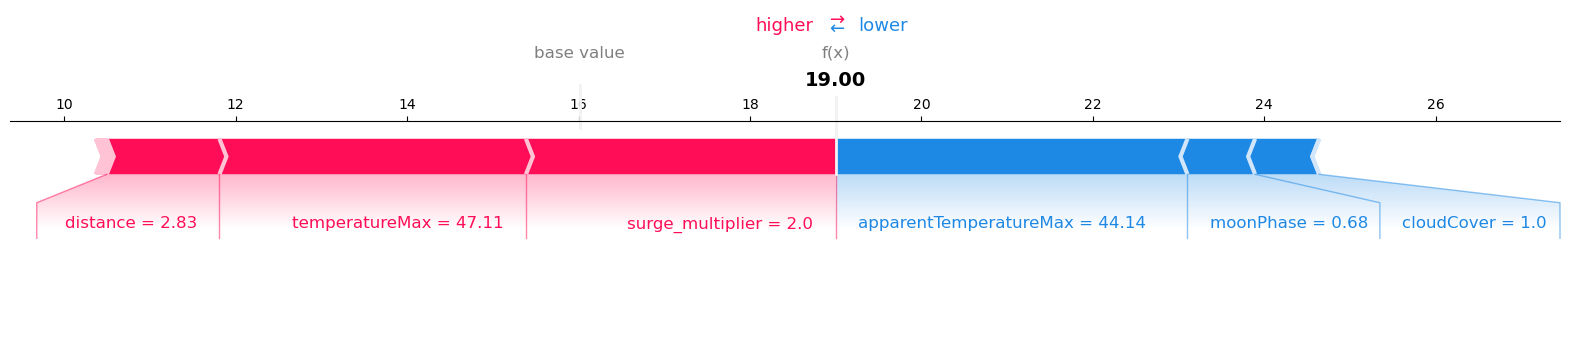

In [320]:
shap_plot